In [79]:
import pandas as pd
import numpy as np
import io
import seaborn as sns 
import matplotlib.pyplot as plt 

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['lymphography_data.csv']))
print(df.head())
print(df.shape)

Saving lymphography_data.csv to lymphography_data (2).csv
   Class  Lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  \
0      3           4                2                1                1   
1      2           3                2                1                1   
2      3           3                2                2                2   
3      3           3                1                1                1   
4      2           3                1                1                1   

   by pass  extravasates  regeneration of  early uptake in  lym.nodes dimin  \
0        1             1                1                2                1   
1        2             2                1                2                1   
2        2             2                2                2                1   
3        1             2                1                2                1   
4        1             1                1                1                1   

   lym.nodes enl

# **Data preparation & Visualisation**

Checking for null values, outliers, datatypes etc.

In [80]:
#lets see the data
print(df.head(5))

   Class  Lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  \
0      3           4                2                1                1   
1      2           3                2                1                1   
2      3           3                2                2                2   
3      3           3                1                1                1   
4      2           3                1                1                1   

   by pass  extravasates  regeneration of  early uptake in  lym.nodes dimin  \
0        1             1                1                2                1   
1        2             2                1                2                1   
2        2             2                2                2                1   
3        1             2                1                2                1   
4        1             1                1                1                1   

   lym.nodes enlar  changes in lym   defect in node   changes in node  \
0

In [81]:
#rows and columns
df.shape

(148, 19)

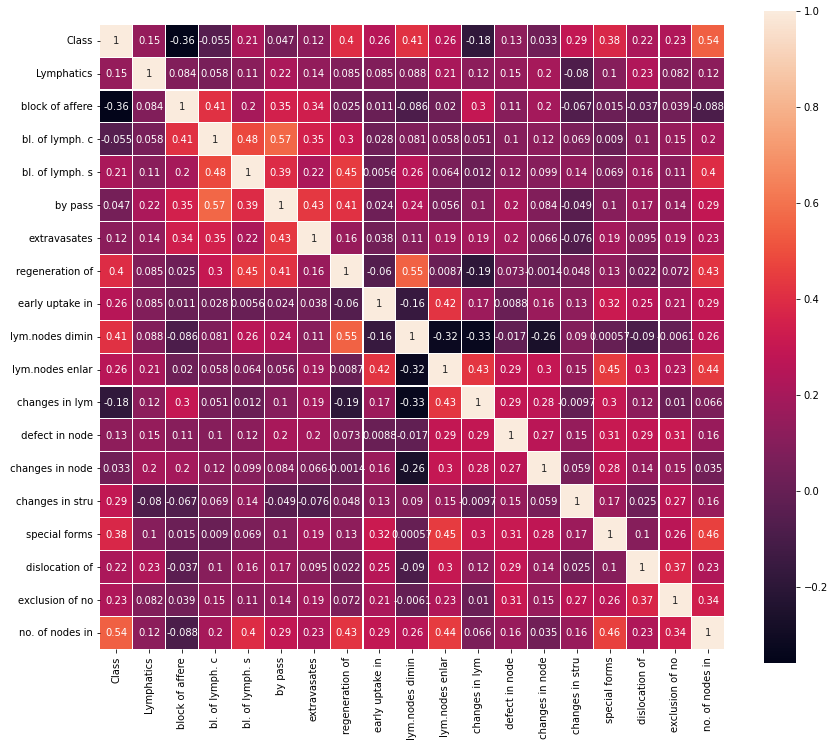

In [82]:
# creating a corr plot to help understand relationships
plt.figure(figsize=(14,12))
corr_plot = sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [83]:
# apply the dtype attribute
result = df.dtypes

print("Output:")
print(result)

Output:
Class               int64
Lymphatics          int64
block of affere     int64
bl. of lymph. c     int64
bl. of lymph. s     int64
by pass             int64
extravasates        int64
regeneration of     int64
early uptake in     int64
lym.nodes dimin     int64
lym.nodes enlar     int64
changes in lym      int64
 defect in node     int64
 changes in node    int64
changes in stru     int64
special forms       int64
dislocation of      int64
exclusion of no     int64
no. of nodes in     int64
dtype: object


In [84]:
#Class value counts
df['Class'].value_counts()

2    81
3    61
4     4
1     2
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


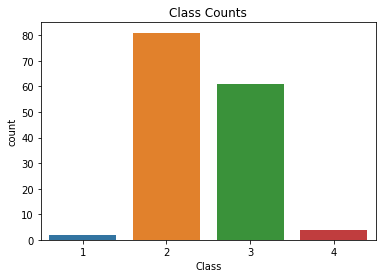

In [85]:
# We can now say the following;

# Class 1 = Normal
# Class 2 = Metastases
# Class 3 = Malign Lymph
# Class 4 = Fibrosis


# And Lets visualize the Class counts
sns.countplot(df['Class'])
plt.title("Class Counts")
plt.show()

In [86]:
# Lets drop the classes we don't need to reduce noise
index_names = df[ df['Class'] == 1 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

In [87]:
# Lets drop the other class we don't need to reduce noise
index_names = df[ df['Class'] == 4 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


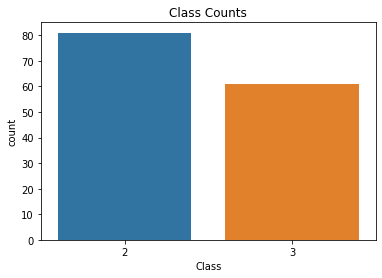

In [88]:
# And now Lets visualize the Class counts
sns.countplot(df['Class'])
plt.title("Class Counts")
plt.show()

In [89]:
df.shape

(142, 19)

In [90]:
display(df)

,Class,Lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
144,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
145,3,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
146,2,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [91]:
print(df.columns)

Index(['Class', 'Lymphatics', 'block of affere', 'bl. of lymph. c',
       'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of',
       'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar',
       'changes in lym', ' defect in node', ' changes in node',
       'changes in stru', 'special forms', 'dislocation of', 'exclusion of no',
       'no. of nodes in'],
      dtype='object')


In [92]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [93]:
#Creating 0/1 class identification

# Class 0 = Metastases
# Class 1 = Malign Lymph

df['Class Ind'] = 0
df.loc[df['Class']==2,'Class Ind'] = 0
df.loc[df['Class']==3,'Class Ind'] = 1

In [94]:
# Lets do a quick check - looking good

df['Class Ind'].value_counts()

0    81
1    61
Name: Class Ind, dtype: int64

In [95]:
df = df.drop(['Class'] ,axis=1)

In [96]:
print(df.columns)

Index(['Lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       ' defect in node', ' changes in node', 'changes in stru',
       'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in',
       'Class Ind'],
      dtype='object')


# **Feature Selection**
Lets look at feature selection, I tried PCA, LDA, Feature Importance, Chi2 worked best. I took two different appraches to visualise Chi2 with the same result, one more manual and one more standard.

In [97]:
from sklearn.feature_selection import SelectKBest,chi2

dff = df[['Lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       ' defect in node', ' changes in node', 'changes in stru',
       'special forms', 'dislocation of', 'exclusion of no','no. of nodes in','Class Ind']]

In [98]:
best = SelectKBest(chi2,k=18)
best.fit(dff[['Lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       ' defect in node', ' changes in node', 'changes in stru',
       'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in']], dff['Class Ind'])

SelectKBest(k=18, score_func=<function chi2 at 0x7f8c1baa4dc0>)

In [99]:
df_score = pd.DataFrame(best.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best.scores_
df_score['columns'] = ['Lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       ' defect in node', ' changes in node', 'changes in stru',
       'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in']
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
17,1.611388e-12,49.907848,no. of nodes in
13,2.379650e-03,9.230898,changes in stru
9,1.320431e-02,6.141529,lym.nodes enlar
1,2.648849e-02,4.923846,block of affere
14,2.720249e-02,4.877913,special forms
7,1.151199e-01,2.482490,early uptake in
15,3.095269e-01,1.032693,dislocation of
16,4.465925e-01,0.579286,exclusion of no
2,4.991955e-01,0.456646,bl. of lymph. c
4,5.661308e-01,0.329199,by pass


In [100]:
#We have value of significance, alpha =0.05. so we have to choose those features with p value <= alpha

In [101]:
df_score[df_score['p_values'] <= 0.05]['columns']

1     block of affere
9     lym.nodes enlar
13    changes in stru
14      special forms
17    no. of nodes in
Name: columns, dtype: object

In [102]:
#Lets look at another methodology to see if the result is the same

In [103]:
X = df.drop('Class Ind',axis=1)
y = df['Class Ind']

In [104]:
chi_scores = chi2(X,y)

In [105]:
#turns scores into an array
chi_scores

(array([1.35343998e-01, 4.92384552e+00, 4.56646257e-01, 2.01575874e-02,
        3.29199497e-01, 7.16721464e-02, 1.61823025e-01, 2.48249010e+00,
        5.62189390e-04, 6.14152926e+00, 1.94181252e-01, 1.12941653e-01,
        1.29658044e-01, 9.23089755e+00, 4.87791313e+00, 1.03269334e+00,
        5.79285570e-01, 4.99078482e+01]),
 array([7.12954298e-01, 2.64884948e-02, 4.99195535e-01, 8.87097842e-01,
        5.66130834e-01, 7.88917516e-01, 6.87483618e-01, 1.15119864e-01,
        9.81083504e-01, 1.32043070e-02, 6.59459145e-01, 7.36819643e-01,
        7.18786855e-01, 2.37964969e-03, 2.72024885e-02, 3.09526917e-01,
        4.46592491e-01, 1.61138839e-12]))

In [106]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

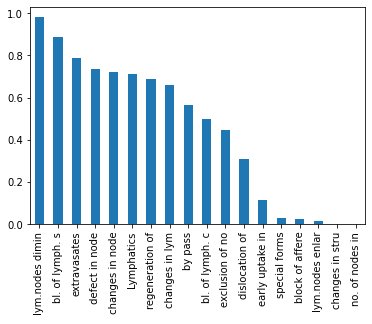

In [107]:
#bar chart of features, loest are most relevant as distance is shorter
p_values.plot.bar()

In [108]:
#Both have the same features indicated - lets look at the top 8 (itested top 5 but the accuracy was a little less)

In [109]:
print(df.columns)

Index(['Lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s',
       'by pass', 'extravasates', 'regeneration of', 'early uptake in',
       'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym',
       ' defect in node', ' changes in node', 'changes in stru',
       'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in',
       'Class Ind'],
      dtype='object')


In [110]:
#Key Features: 'no. of nodes in', 'changes in stru', 'lym.nodes enlar', 
#'block of affere','special forms', 'early uptake in','dislocation of'

In [111]:
#dropping unwanted columns from independent variables, redcues noise
x_vars = df.drop(['Class Ind', 'lym.nodes dimin','bl. of lymph. s','extravasates',
                 ' defect in node',' changes in node','Lymphatics','regeneration of','changes in lym',
                 'by pass','bl. of lymph. c'] ,axis=1)
print(x_vars)

     block of affere  early uptake in  lym.nodes enlar  changes in stru  \
0                  2                2                2                8   
1                  2                2                3                4   
2                  2                2                4                8   
3                  1                2                3                4   
4                  1                1                2                5   
..               ...              ...              ...              ...   
143                2                2                2                5   
144                1                1                1                3   
145                2                2                3                8   
146                1                2                2                2   
147                2                2                3                4   

     special forms  dislocation of  exclusion of no  no. of nodes in  
0                1          

In [112]:
#independent variable
y_var = df['Class Ind']
print(y_var)

0      1
1      0
2      1
3      1
4      0
      ..
143    1
144    0
145    1
146    0
147    0
Name: Class Ind, Length: 142, dtype: int64


In [113]:
print(x_vars.columns)

Index(['block of affere', 'early uptake in', 'lym.nodes enlar',
       'changes in stru', 'special forms', 'dislocation of', 'exclusion of no',
       'no. of nodes in'],
      dtype='object')


# **Model Preperation**

In [114]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
#importaing libraries
from sklearn.model_selection import train_test_split
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

In [116]:
# 70% training as requested
x_train,x_test,y_train,y_test = train_test_split(x_vars,y_var, train_size = 0.7,random_state=42)

In [117]:
print(x_train)

     block of affere  early uptake in  lym.nodes enlar  changes in stru  \
86                 2                2                2                5   
29                 1                1                2                8   
42                 2                1                3                4   
89                 1                2                3                8   
25                 1                1                3                8   
..               ...              ...              ...              ...   
74                 1                1                2                3   
110                1                1                2                8   
15                 2                2                2                5   
96                 2                1                2                3   
106                2                2                2                8   

     special forms  dislocation of  exclusion of no  no. of nodes in  
86               2          

In [118]:
print(y_train)

86     0
29     1
42     0
89     0
25     1
      ..
74     1
110    0
15     0
96     0
106    0
Name: Class Ind, Length: 99, dtype: int64


In [119]:
print(type(x_train))
print(type(y_train))
data = x_train.join(y_train)
print(data)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
     block of affere  early uptake in  lym.nodes enlar  changes in stru  \
86                 2                2                2                5   
29                 1                1                2                8   
42                 2                1                3                4   
89                 1                2                3                8   
25                 1                1                3                8   
..               ...              ...              ...              ...   
74                 1                1                2                3   
110                1                1                2                8   
15                 2                2                2                5   
96                 2                1                2                3   
106                2                2                2                8   

     special forms  dislo

*Loading estimators to build our model, I tried both maximum liklihood and Bayesian - which is essentially a fight between frequentist and bayseian prbabability.The Hill Climbing Algorithm is a local search algorithm that continuously moves towards increasing heights/values ​​to find the top of a mountain or the best solution to a problem. Terminates when a peak is reached where there are no neighbors with higher values*



In [120]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
pip install pylab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [122]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

import pylab as plt
import networkx as nx

In [123]:
#Calculating scores
bdeu = BDeuScore(data, equivalent_sample_size=10)
k2 = K2Score(data)
bic = BicScore(data)

  0%|          | 0/1000000 [00:00<?, ?it/s]

['Class Ind', 'block of affere', 'changes in stru', 'dislocation of', 'early uptake in', 'exclusion of no', 'lym.nodes enlar', 'no. of nodes in', 'special forms']
[('early uptake in', 'block of affere'), ('lym.nodes enlar', 'early uptake in'), ('lym.nodes enlar', 'changes in stru'), ('lym.nodes enlar', 'special forms'), ('dislocation of', 'early uptake in'), ('exclusion of no', 'dislocation of'), ('exclusion of no', 'no. of nodes in'), ('no. of nodes in', 'Class Ind'), ('no. of nodes in', 'lym.nodes enlar'), ('Class Ind', 'special forms'), ('Class Ind', 'block of affere')]


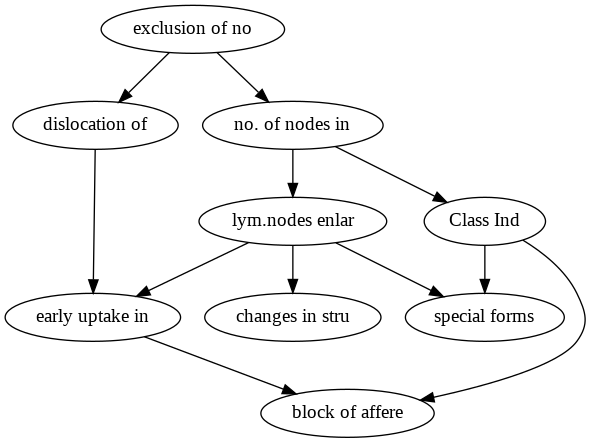

In [124]:
# HC Implementations
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method='K2Score')
print(sorted(best_model.nodes()))
print(best_model.edges())
display(Image((nx.drawing.nx_pydot.to_pydot(best_model)).create_png()))

In [125]:
print(type(best_model))
model_final = BayesianNetwork(best_model)
print(type(model_final))

<class 'pgmpy.base.DAG.DAG'>
<class 'pgmpy.models.BayesianNetwork.BayesianNetwork'>


In [126]:
# Scoring the parameters - nodes
pe = ParameterEstimator(best_model, data)
model_final.fit(data, estimator=BayesianEstimator, prior_type="BDeu") #
for cpd in model_final.get_cpds():
    print(cpd)

+--------------------+-----+---------------------+
| Class Ind          | ... | Class Ind(1)        |
+--------------------+-----+---------------------+
| early uptake in    | ... | early uptake in(2)  |
+--------------------+-----+---------------------+
| block of affere(1) | ... | 0.6538461538461539  |
+--------------------+-----+---------------------+
| block of affere(2) | ... | 0.34615384615384615 |
+--------------------+-----+---------------------+
+--------------------+-----+---------------------+
| dislocation of     | ... | dislocation of(2)   |
+--------------------+-----+---------------------+
| lym.nodes enlar    | ... | lym.nodes enlar(4)  |
+--------------------+-----+---------------------+
| early uptake in(1) | ... | 0.01773049645390071 |
+--------------------+-----+---------------------+
| early uptake in(2) | ... | 0.9822695035460993  |
+--------------------+-----+---------------------+
+--------------------+-----+---------------------+
| no. of nodes in    | ... | no

In [127]:
x_test.shape

(43, 8)

In [129]:
#Printing the model using PyLab
#nx.draw(model_final, with_labels=True)

In [131]:
# Create a bayesian model with nodes and edges.
#model_final = BayesianNetwork([('early uptake in', 'block of affere'), ('lym.nodes enlar', 'early uptake in'), ('lym.nodes enlar', 'changes in stru'), ('lym.nodes enlar', 'special forms'), ('dislocation of', 'early uptake in'), ('exclusion of no', 'dislocation of'), ('exclusion of no', 'no. of nodes in'), ('no. of nodes in', 'Class Ind'), ('no. of nodes in', 'lym.nodes enlar'), ('Class Ind', 'special forms'), ('Class Ind', 'block of affere')])

# Estimate the CPD for each variable based on a given data set.
#model_final.fit(data, estimator=BayesianEstimator)
#fig, ax = plt.subplots(figsize=(15, 10))


#pos = nx.spring_layout(model_final) 
#nx.draw(model_final, pos=pos, with_labels=True, node_size = 13000, font_size = 15, arrowsize=20, node_color='red', ax=ax)

In [132]:
# Check the model for various errors. This method checks for the following errors.
# * Checks if the sum of the probabilities for each state is equal to 1 (tol=0.01).
# * Checks if the CPDs associated with nodes are consistent with their parents.
model_final.check_model()

True

In [133]:
x_test

,block of affere,early uptake in,lym.nodes enlar,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
135,2,2,2,4,3,2,2,7
20,1,2,2,4,3,2,2,3
85,2,1,2,8,3,2,2,1
100,1,2,3,8,3,2,2,3
59,2,2,3,8,3,2,2,2
12,2,2,2,3,2,1,1,1
102,1,2,2,4,1,2,1,2
68,1,1,2,3,2,2,1,1
69,1,2,3,6,3,2,2,6
19,2,2,3,2,2,2,1,1


In [134]:
from pandas.core.groupby.groupby import DataFrame
infer = VariableElimination(model_final)

print(type(x_test))
print(type(y_test))
print(x_test.iat[0,0])

num_rows, num_cols = x_test.shape
print(num_rows)
posterior_py = np.empty(shape=(num_rows,2))
print(posterior_py.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
2
43
(43, 2)


In [135]:
x_test

,block of affere,early uptake in,lym.nodes enlar,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
135,2,2,2,4,3,2,2,7
20,1,2,2,4,3,2,2,3
85,2,1,2,8,3,2,2,1
100,1,2,3,8,3,2,2,3
59,2,2,3,8,3,2,2,2
12,2,2,2,3,2,1,1,1
102,1,2,2,4,1,2,1,2
68,1,1,2,3,2,2,1,1
69,1,2,3,6,3,2,2,6
19,2,2,3,2,2,2,1,1


In [136]:
print(x_test.columns)

Index(['block of affere', 'early uptake in', 'lym.nodes enlar',
       'changes in stru', 'special forms', 'dislocation of', 'exclusion of no',
       'no. of nodes in'],
      dtype='object')


In [137]:
result = infer.query(['Class Ind'], evidence={'block of affere': x_test.iat[0,0],
                                              'early uptake in': x_test.iat[0,1],
                                              'lym.nodes enlar': x_test.iat[0,2],
                                              'changes in stru': x_test.iat[0,3],
                                              'special forms'  : x_test.iat[0,4],
                                              'dislocation of' : x_test.iat[0,5],
                                              'exclusion of no': x_test.iat[0,6],
                                              'no. of nodes in': x_test.iat[0,7] })
print(result)
#,'changes in stru': x_test.iat[0,3]

+--------------+------------------+
| Class Ind    |   phi(Class Ind) |
+==============+==================+
| Class Ind(0) |           0.1408 |
+--------------+------------------+
| Class Ind(1) |           0.8592 |
+--------------+------------------+


In [138]:
print(result.values[0])
print(result.values[1])

0.14078851442095552
0.8592114855790446


In [139]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [140]:
# I tried to propagate the parent only (no of nodes in), since the other are children othe class Ind, but the accuracy was way less
for i in range(num_rows):
  try:
    print('block of affere', x_test.iat[i,0],'early uptake in', x_test.iat[i,1],'lym.nodes enlar', x_test.iat[i,2],
          'changes in stru', x_test.iat[i,3],'special forms'  , x_test.iat[i,4],'dislocation of' , x_test.iat[i,5],
          'exclusion of no', x_test.iat[i,6],'no. of nodes in', x_test.iat[i,7])

    result = infer.query(['Class Ind'], evidence={'block of affere': x_test.iat[i,0],'early uptake in': x_test.iat[i,1],
                                                  'lym.nodes enlar': x_test.iat[i,2],'changes in stru': x_test.iat[i,3],
                                                  'special forms'  : x_test.iat[i,4],'dislocation of' : x_test.iat[i,5],
                                                  'exclusion of no': x_test.iat[i,6],'no. of nodes in': x_test.iat[i,7]})
    
    posterior_py[i]= result.values[0],result.values[1]
  except KeyError as exception:
      print('KeyError: {} does not exist in the column {}.'.format(str(exception),i))
      continue


block of affere 2 early uptake in 2 lym.nodes enlar 2 changes in stru 4 special forms 3 dislocation of 2 exclusion of no 2 no. of nodes in 7
block of affere 1 early uptake in 2 lym.nodes enlar 2 changes in stru 4 special forms 3 dislocation of 2 exclusion of no 2 no. of nodes in 3
block of affere 2 early uptake in 1 lym.nodes enlar 2 changes in stru 8 special forms 3 dislocation of 2 exclusion of no 2 no. of nodes in 1
block of affere 1 early uptake in 2 lym.nodes enlar 3 changes in stru 8 special forms 3 dislocation of 2 exclusion of no 2 no. of nodes in 3
block of affere 2 early uptake in 2 lym.nodes enlar 3 changes in stru 8 special forms 3 dislocation of 2 exclusion of no 2 no. of nodes in 2
block of affere 2 early uptake in 2 lym.nodes enlar 2 changes in stru 3 special forms 2 dislocation of 1 exclusion of no 1 no. of nodes in 1
block of affere 1 early uptake in 2 lym.nodes enlar 2 changes in stru 4 special forms 1 dislocation of 2 exclusion of no 1 no. of nodes in 2
block of affe

In [141]:
#print(posterior_py)

In [142]:
#Getting the final vector to compare
print(type(y_train))

<class 'pandas.core.series.Series'>


In [143]:
y_pred=list()
for i in range(num_rows):
  if posterior_py[i][0]>posterior_py[i][1]:
    y_pred.append(0) #The category zero was the one with the highest probability
  else:
    y_pred.append(1) #The category one was the one with the highest probability

In [144]:
ypred = pd.core.series.Series(y_pred)

In [145]:
#Prediction table
print(ypred)

0     1
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    1
19    0
20    0
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    0
30    0
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64


In [146]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

accuracy of the model:  0.7906976744186046


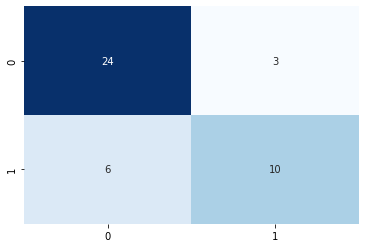

In [147]:
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
print('accuracy of the model: ',ac)

In [148]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.77      0.62      0.69        16

    accuracy                           0.79        43
   macro avg       0.78      0.76      0.77        43
weighted avg       0.79      0.79      0.79        43



In [149]:
# Class 0 = Metastases
# Class 1 = Malign Lymph

In [150]:
# Causal inferencing

from pgmpy.inference import BeliefPropagation

class_infer = BeliefPropagation(model_final)

# What"s the probability of a candidate getting a strong letter of recommendation
q = class_infer.query(variables=['Class Ind'], evidence=None)
print(q)

+--------------+------------------+
| Class Ind    |   phi(Class Ind) |
+==============+==================+
| Class Ind(0) |           0.5433 |
+--------------+------------------+
| Class Ind(1) |           0.4567 |
+--------------+------------------+


In [151]:
# What"s the probability of a patient having Metastese or Malign Lymph based on Lymph Nodes Enlarged
q = class_infer.query(variables=['Class Ind'], evidence={'lym.nodes enlar':4})
print(q)

+--------------+------------------+
| Class Ind    |   phi(Class Ind) |
+==============+==================+
| Class Ind(0) |           0.2485 |
+--------------+------------------+
| Class Ind(1) |           0.7515 |
+--------------+------------------+


In [152]:
#saving pickled model
import pickle
filename = 'my_finalized_model.sav'
pickle.dump(model_final, open(filename, 'wb'))

# **Artificial Nueral Network using Keras**

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [154]:
#pip install keras

In [155]:
x_test.shape

(43, 8)

In [156]:
#pip install tensorflow

In [157]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [158]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(11, activation='relu', kernel_initializer='glorot_uniform',input_dim=8))

# Adding the second hidden layer
classifier.add(Dense(11, activation='relu', kernel_initializer='glorot_uniform',input_dim=8))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform',input_dim=8))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [159]:
classifier.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 12ms/step - loss: 0.7040 - accuracy: 0.4040
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.4343
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6839 - accuracy: 0.4343
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6762 - accuracy: 0.4545
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.4848
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6613 - accuracy: 0.4949
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6546 - accuracy: 0.5051
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6483 - accuracy: 0.5455
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.5455
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6356 - accuracy: 0.5556
Epoch 11/50
4/4 [==================

In [160]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

2/2 [==============================] - 0s 8ms/step


accuracy of the model:  0.7674418604651163


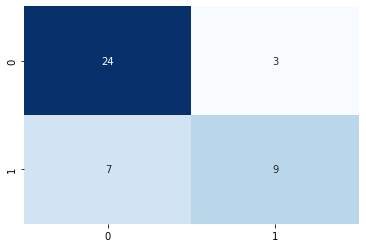

In [161]:
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

In [162]:
# Nueral network
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.75      0.56      0.64        16

    accuracy                           0.77        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.77      0.77      0.76        43



In [163]:
# Bayseian Network
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.77      0.62      0.69        16

    accuracy                           0.79        43
   macro avg       0.78      0.76      0.77        43
weighted avg       0.79      0.79      0.79        43

